Data diri
- Nama     = Mohammad Habibul Akhyar
- username = habkhyar
- email    = khyar075@gmail.com

In [1]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [2]:
import os, random, shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from IPython.display import Image, display
from keras.preprocessing import image
import numpy as np

In [3]:
# Dataset directory
dataset_dir = '/content/rockpaperscissors'
categories = [
    "paper",
    "rock",
    "scissors"
]

for category in categories:
    category_dir = os.path.join(dataset_dir, category)

    # Membuat folder train dan validasi
    train_dir = os.path.join(dataset_dir, 'train', category)
    val_dir = os.path.join(dataset_dir, 'validation', category)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    images = os.listdir(category_dir)

    # Menggunakan train_test_split untuk membagi data dengan test 40%
    train_images, val_images = train_test_split(images, test_size=0.4, random_state=42)

    # Pindahkan gambar ke direktori train dan validasi
    for img in train_images:
        src_path = os.path.join(category_dir, img)
        dest_path = os.path.join(train_dir, img)
        shutil.copy(src_path, dest_path)

    for img in val_images:
        src_path = os.path.join(category_dir, img)
        dest_path = os.path.join(val_dir, img)
        shutil.copy(src_path, dest_path)

In [4]:
# Data augmentasi untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')

data_test = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest')

# Rescaling untuk validasi
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# gambar dimensi, epoch dan batchsize
img_width, img_height = 180, 180
epochs = 10
batch_size = 32

In [6]:
train_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical' # Mereturnkan 2D
)

validation_generator = val_datagen.flow_from_directory(
    'rockpaperscissors/validation',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [7]:
# Membuat model
model = Sequential()

# Menambahkan layer convolusi dan max pooling
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Mengubah array multidimensi jadi single array
model.add(Flatten())

# Menambah layer dense
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # untuk mencegah overfitting
model.add(Dense(3, activation='softmax'))

# Menggunakan optimizer adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=8,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/8
41/41 [==============================] - 177s 4s/step - loss: 1.1038 - accuracy: 0.3994 - val_loss: 0.7659 - val_accuracy: 0.7350
Epoch 2/8
41/41 [==============================] - 187s 5s/step - loss: 0.5974 - accuracy: 0.7721 - val_loss: 0.3674 - val_accuracy: 0.8681
Epoch 3/8
41/41 [==============================] - 194s 5s/step - loss: 0.2992 - accuracy: 0.8895 - val_loss: 0.1785 - val_accuracy: 0.9468
Epoch 4/8
41/41 [==============================] - 172s 4s/step - loss: 0.2455 - accuracy: 0.9154 - val_loss: 0.1517 - val_accuracy: 0.9479
Epoch 5/8
41/41 [==============================] - 185s 4s/step - loss: 0.2318 - accuracy: 0.9131 - val_loss: 0.1685 - val_accuracy: 0.9444
Epoch 6/8
41/41 [==============================] - 189s 5s/step - loss: 0.2012 - accuracy: 0.9299 - val_loss: 0.1417 - val_accuracy: 0.9456
Epoch 7/8
41/41 [==============================] - 182s 4s/step - loss: 0.2133 - accuracy: 0.9352 - val_loss: 0.1363 - val_accuracy: 0.9583
Epoch 8/8
41/41 [===

In [9]:
# Evaluasi model
score = model.evaluate(validation_generator, verbose=1)

# Hasil evaluasi
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

28/28 [==============================] - 26s 913ms/step - loss: 0.1355 - accuracy: 0.9521
Test Loss: 0.1355438232421875
Test Accuracy: 0.9520547986030579


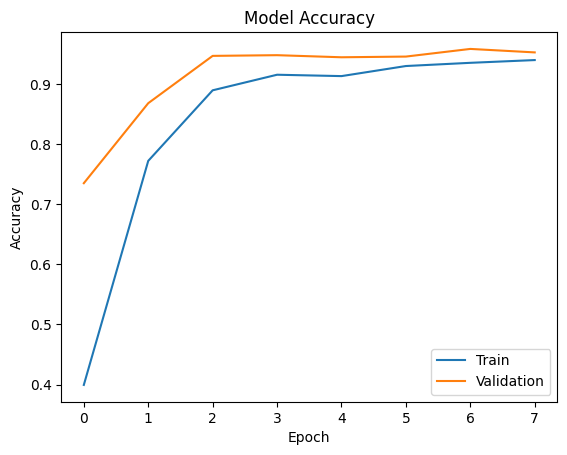

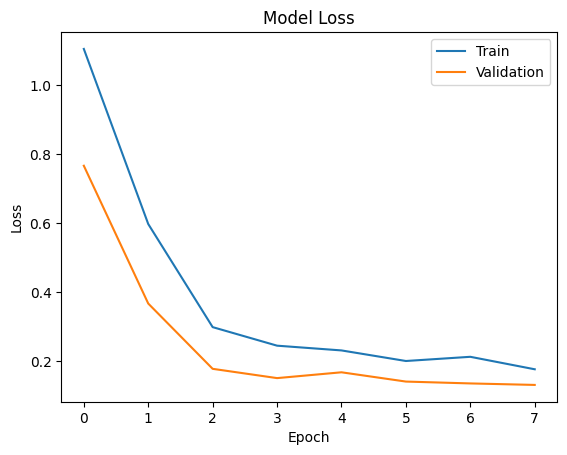

In [10]:
# Plot loss dan accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

28/28 [==============================] - 27s 923ms/step


Text(50.722222222222214, 0.5, 'True')

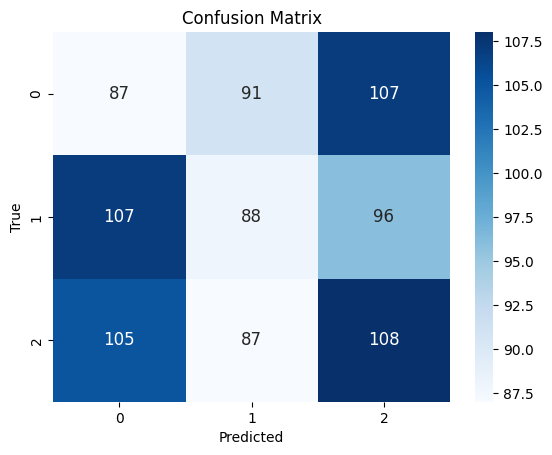

In [11]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, annot_kws={"fontsize": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx (1).png
1/1 [==============================] - 0s 402ms/step


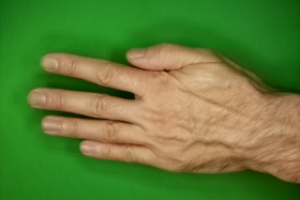

Hasil kategori =  paper


In [13]:
# Upload gambar
uploaded = files.upload()
uploaded_image_path = list(uploaded.keys())[0]
img = image.load_img(uploaded_image_path, target_size=(180, 180, 3))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
prediksi = model.predict(img)
prediksi_label = categories[np.argmax(prediksi)]
display(Image(uploaded_image_path))
print("Hasil kategori = ", prediksi_label)